# Matplotlib и Seaborn - главные составляющие визуализации

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Используем тот же датасет про титаник:

In [3]:
data = pd.read_csv('../Data/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Seaborn

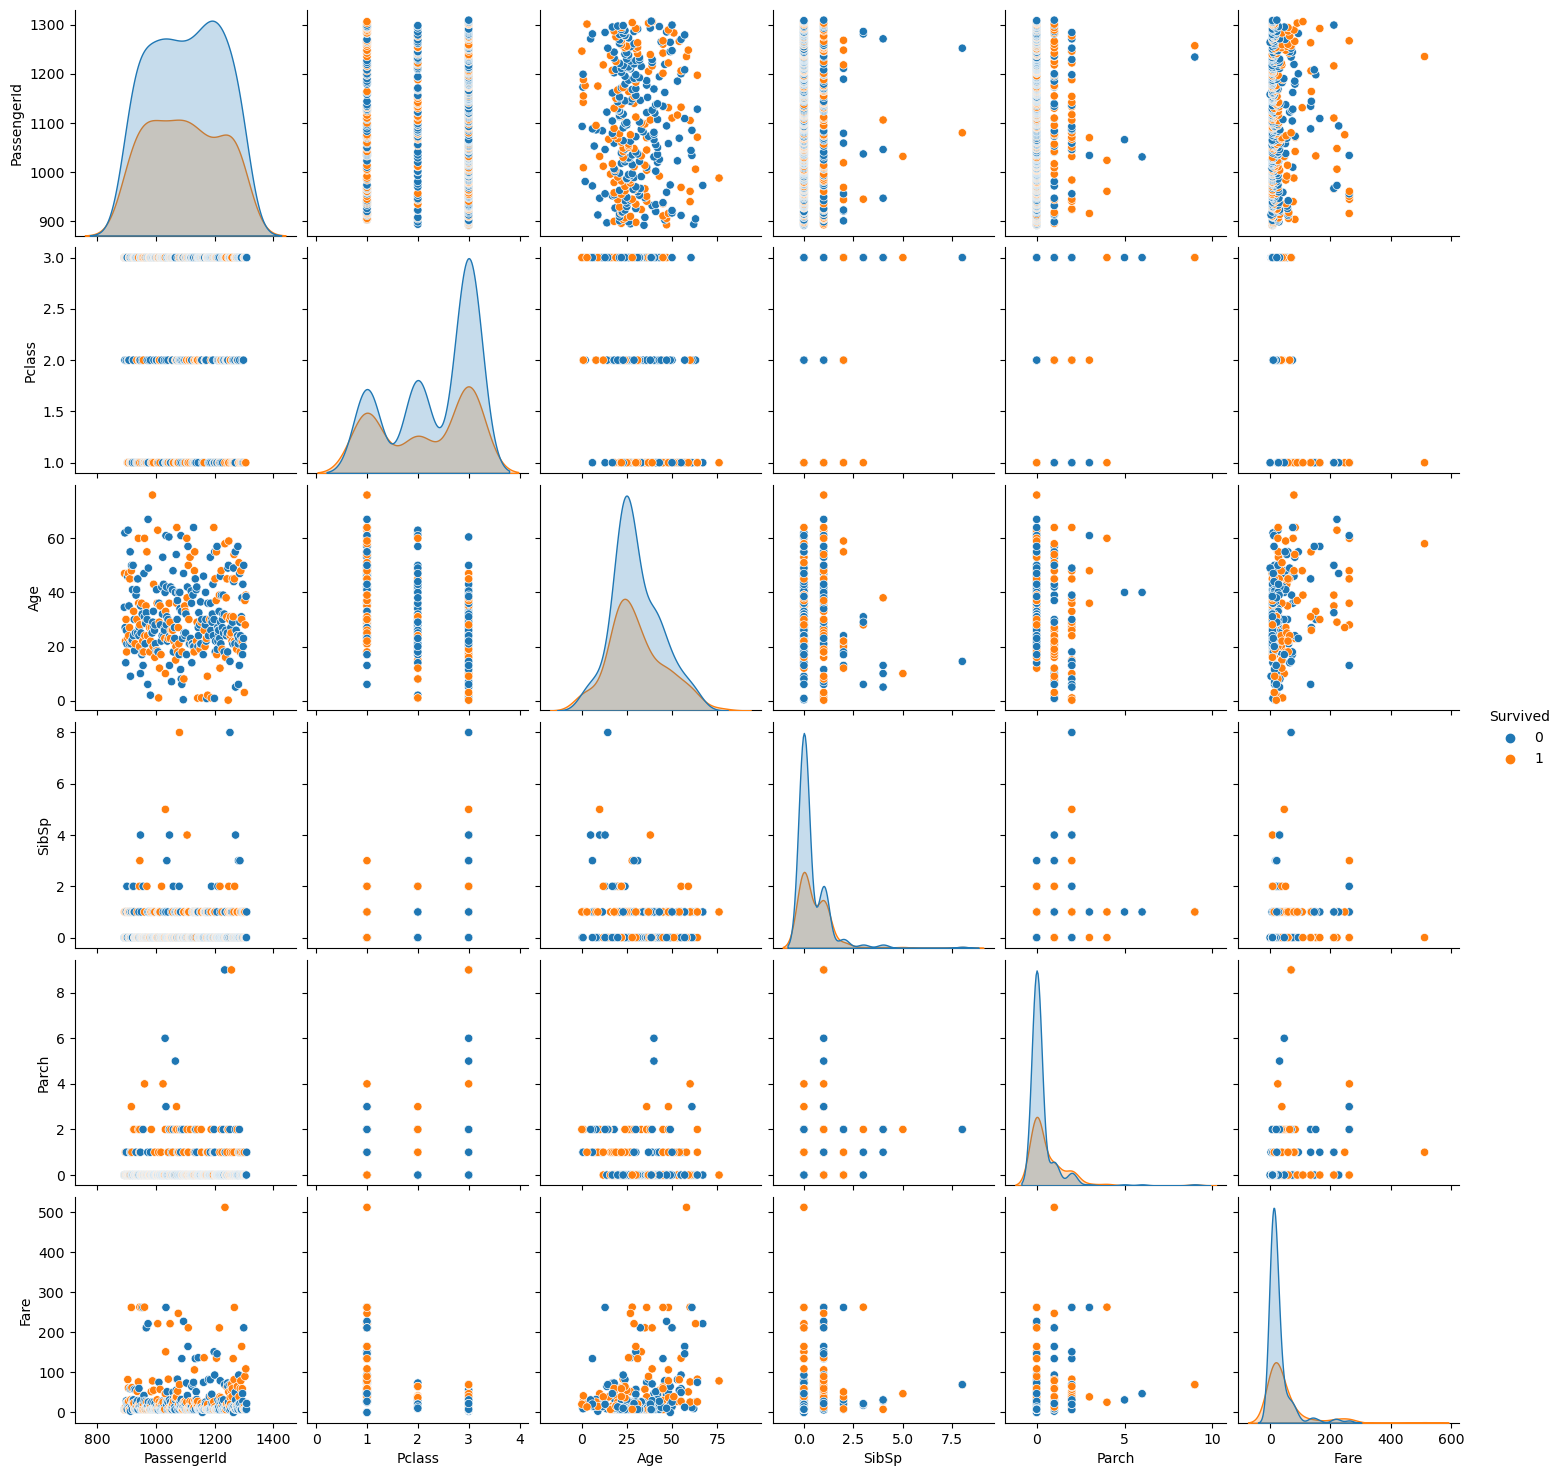

In [4]:
sns.pairplot(data, hue = 'Survived') 

<Axes: xlabel='Pclass', ylabel='Survived'>

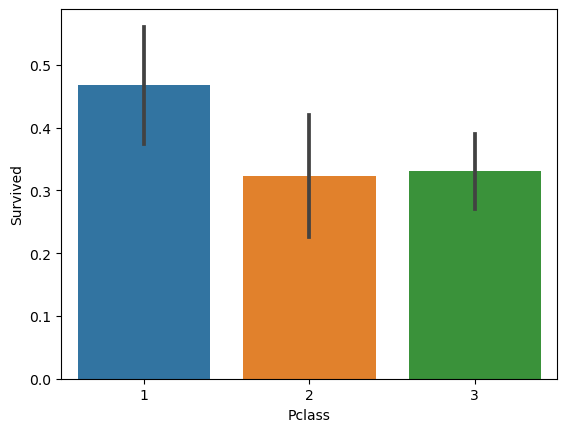

In [5]:
sns.barplot(data, x = 'Pclass', y = 'Survived')

<Axes: xlabel='Survived', ylabel='count'>

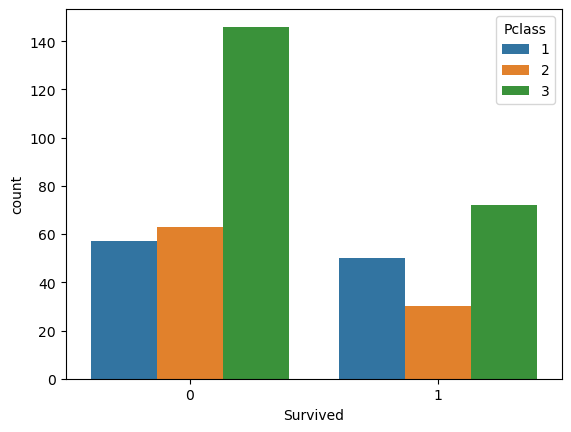

In [6]:
sns.countplot(data, x = 'Survived', hue = 'Pclass')

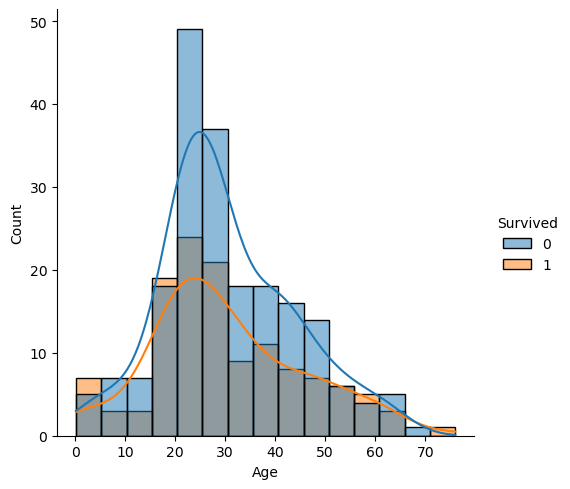

In [7]:
sns.displot(data, x="Age", hue="Survived", kde = True)

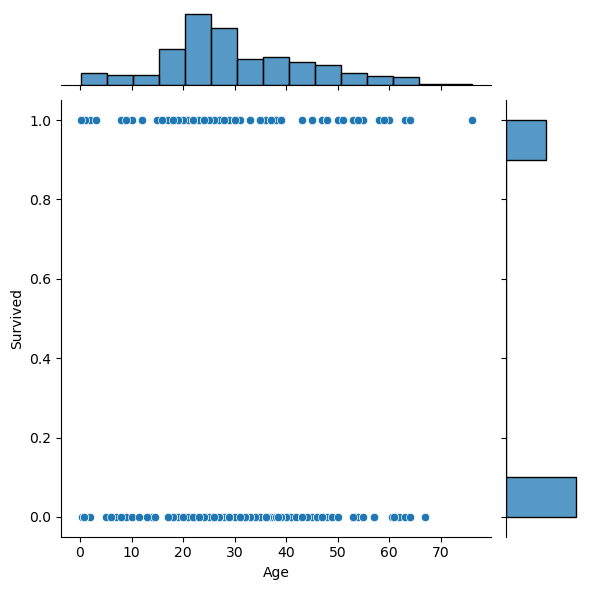

In [57]:
sns.jointplot(data, x = 'Age',  y = 'Survived')

<Axes: >

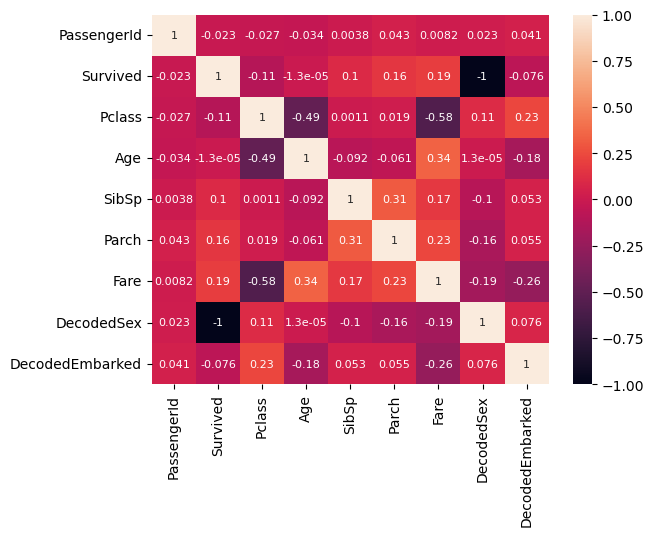

In [8]:
# Предобработка данных

datasd = data.select_dtypes(include='object')
new_data = data.drop(columns=['Name', 'Ticket', 'Cabin'])
new_data["DecodedSex"] = new_data["Sex"].map({"male": 1, "female": -1, "unknown": 0})
new_data["DecodedEmbarked"] = new_data["Embarked"].map({"S": 1, "C": -1, "Q": 0})
new_data_dec = new_data.drop(columns=['Sex', 'Embarked'])

# Тепловая карта

sns.heatmap(new_data_dec.corr(), annot=True, annot_kws={'size': 8})

<Axes: xlabel='Age', ylabel='Density'>

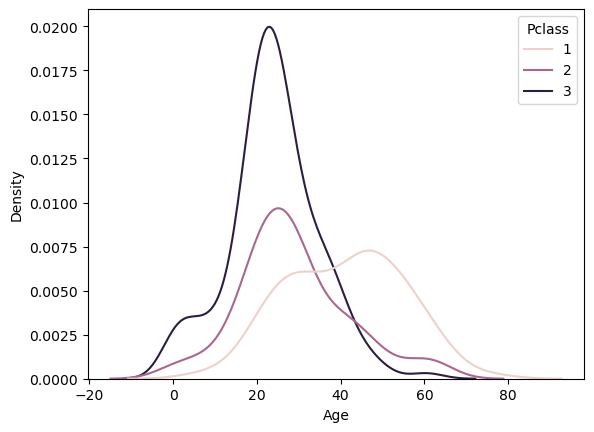

In [9]:
sns.kdeplot(data, x = 'Age',hue = 'Pclass')

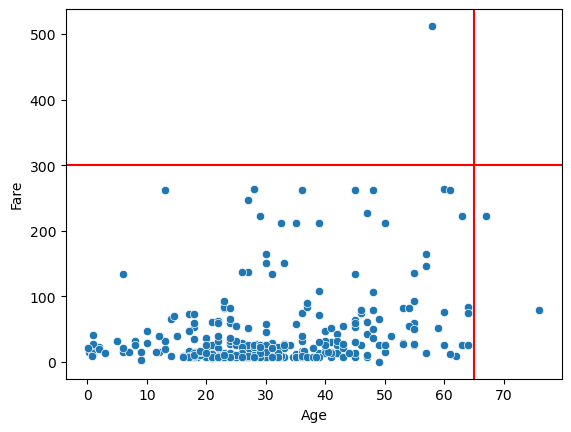

In [24]:
sns.scatterplot(data, x = 'Age', y = 'Fare')
plt.axhline(y = 300, c = 'r')
plt.axvline(x = 65, c = 'r')

<Axes: xlabel='Age'>

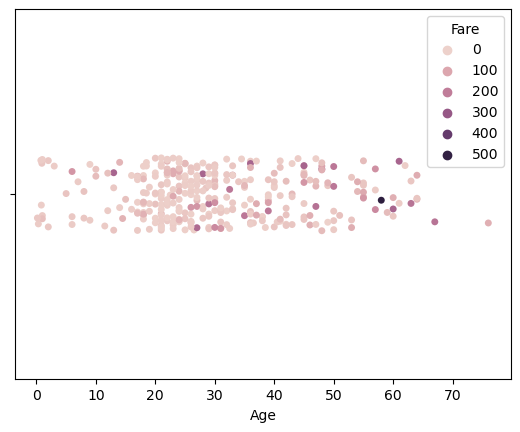

In [11]:
sns.stripplot(data, x = 'Age', hue = 'Fare')

## Matplotlib

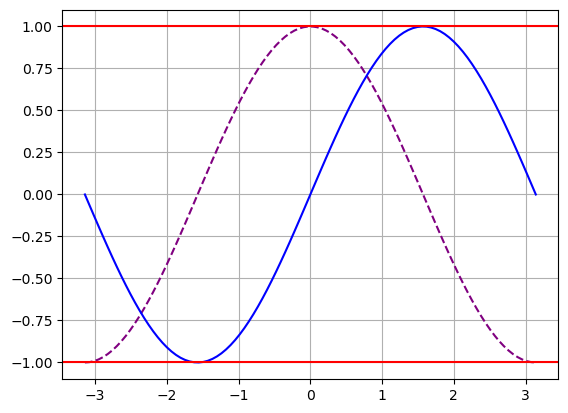

In [34]:
x=np.linspace(-np.pi,np.pi,100)
cs=np.cos(x)
sn=np.sin(x)

plt.figure()
plt.grid()
plt.plot(x,cs,'--',color='purple')
plt.plot(x,sn,color='blue')
plt.axhline(y = 1.00, c = 'r')
plt.axhline(y = -1.00, c = 'r')

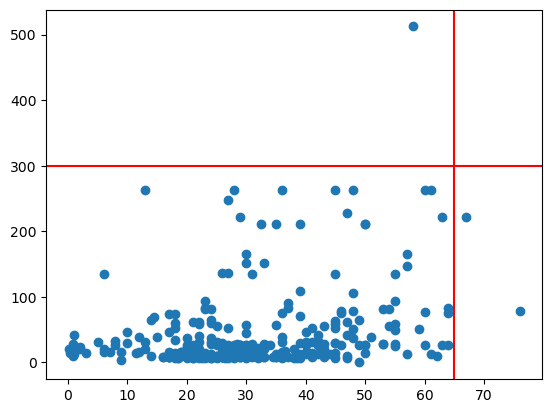

In [36]:
plt.figure()
plt.scatter(x = data['Age'], y = data['Fare'])
plt.axhline(y = 300, c = 'r')
plt.axvline(x = 65, c = 'r')

<BarContainer object of 418 artists>

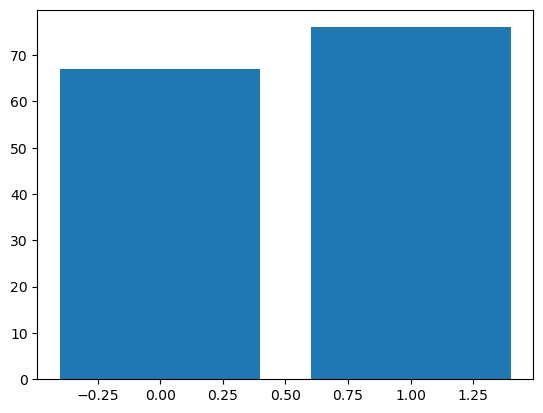

In [48]:
plt.bar(data['Survived'], data['Age'])

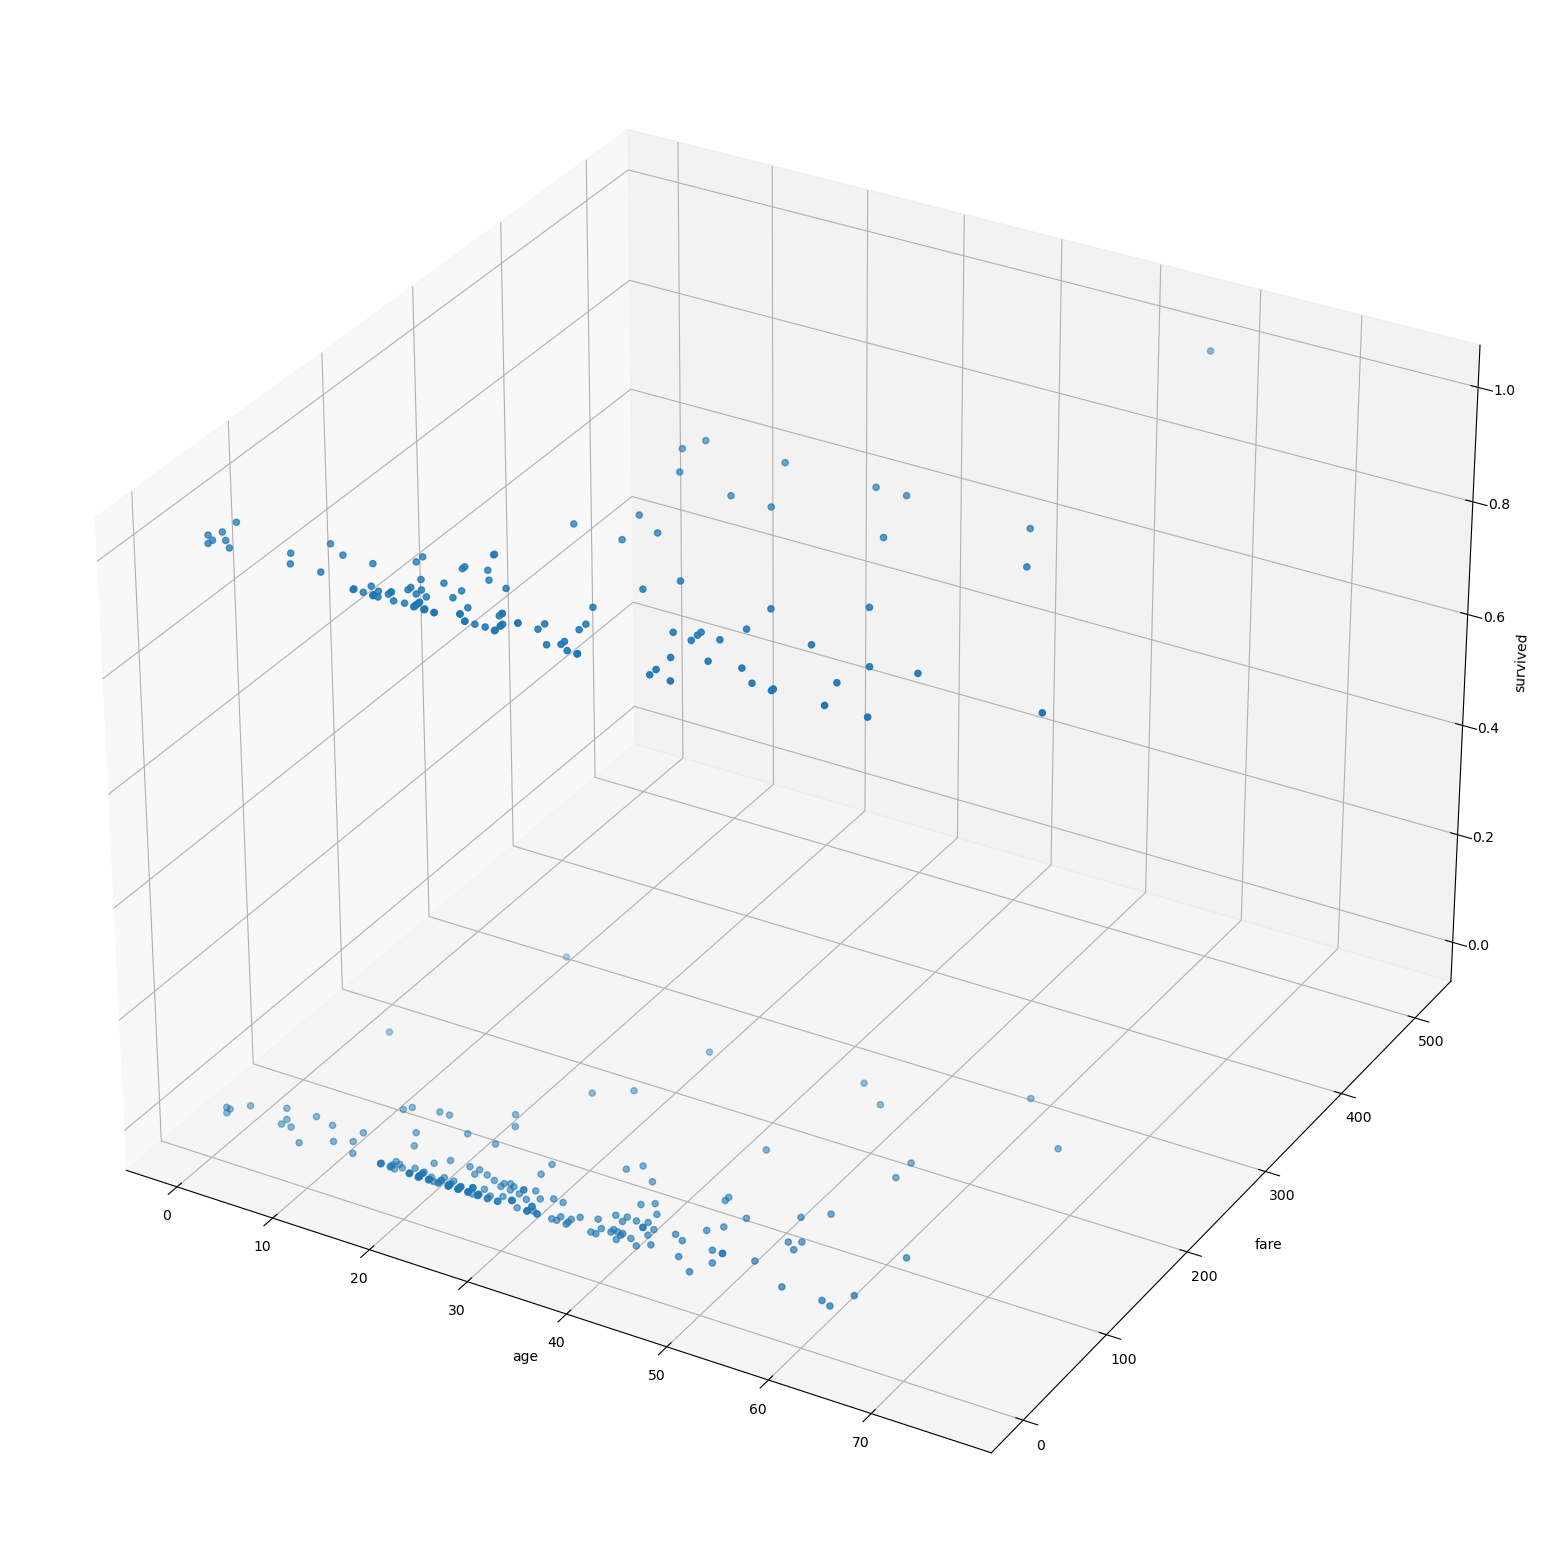

In [60]:
age = data['Age']
fare = data['Fare']
survived = data['Survived']

fig = plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(age, fare, survived)
ax.set_xlabel('age')
ax.set_ylabel('fare')
ax.set_zlabel('survived')

plt.show()

## На мой взгляд, по простоте построения и красоте графиков выигрывает Seaborn. Из Matplotlib берутся только некоторые полезные методы